# LUNG CANCER PREDICTION
Dataset obtained from Kaggle, where an attempt is made to predict the risk of lung cancer depending on genetic and environmental factors, among others.
Some extra steps were carried out to demonstrate the ease of using sklearn and its object-oriented programming, therefore, the apparently repetitive lines of code have a pedagogical purpose, given that it is a training data set.

In [271]:
## First Import al basic libreries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Import the dataset

In [272]:
data = pd.read_csv("cancer patient data sets.csv")
data.head(5)

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


#### Delete data that is not useful for prediction, such as identification and index

In [273]:
data = data.drop(["index","Patient Id"], axis = 1)

#### Replace categorical variables in numerical ones to be able to make the prediction.
##### 1 = Low Risk
##### 2 = Medium Risk
##### 3 = High Risk

In [274]:
data["riesgo"] = 0
data.loc[data["Level"] == "High", "riesgo"] = 3
data.loc[data["Level"] == "Medium", "riesgo"] = 2
data.loc[data["Level"] == "Low", "riesgo"] = 1


In [275]:
data["riesgo"].value_counts()

riesgo
3    365
2    332
1    303
Name: count, dtype: int64

#### Count NaN and remove "Level" column to avoid interference

In [276]:
data.isna().sum()

Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
riesgo                      0
dtype: int64

In [277]:
data = data.drop("Level", axis = 1)

#### Evaluate the correlation of variables

<Axes: >

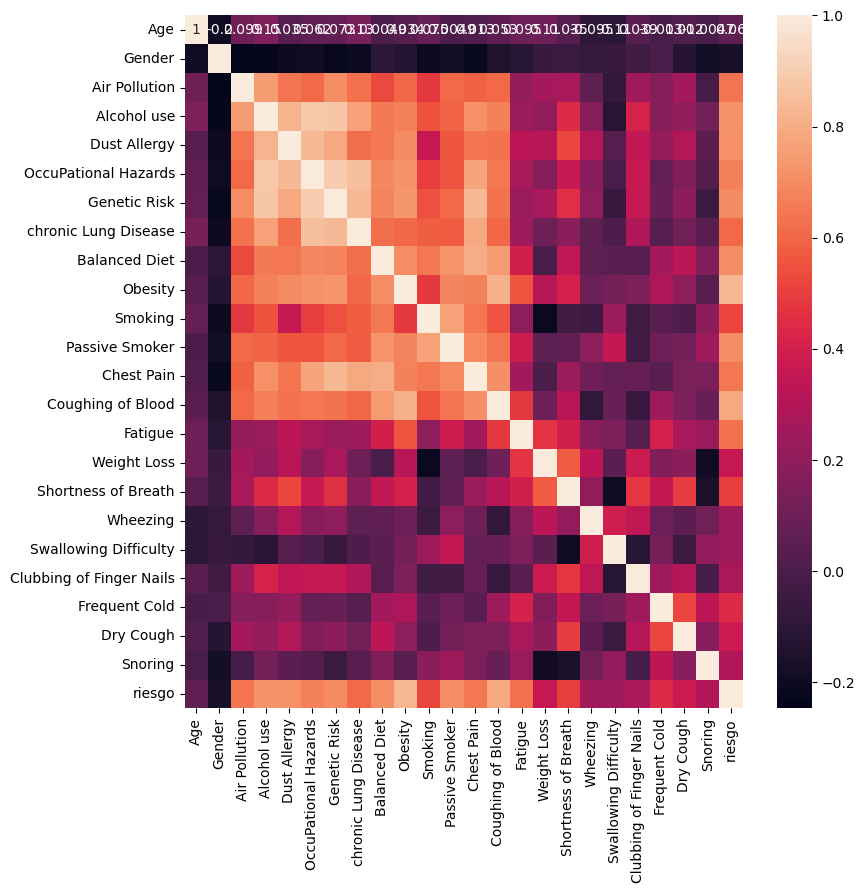

In [278]:
plt.figure(figsize=(9,9))
sns.heatmap(data.corr() ,annot = True)

We can see that there is an interesting correlation between the risk variable and obesity, or between risk and coughing up blood.
It is striking that there appears to be no correlation between age and the risk of having lung cancer.

#### Let's now evaluate the sample distribution

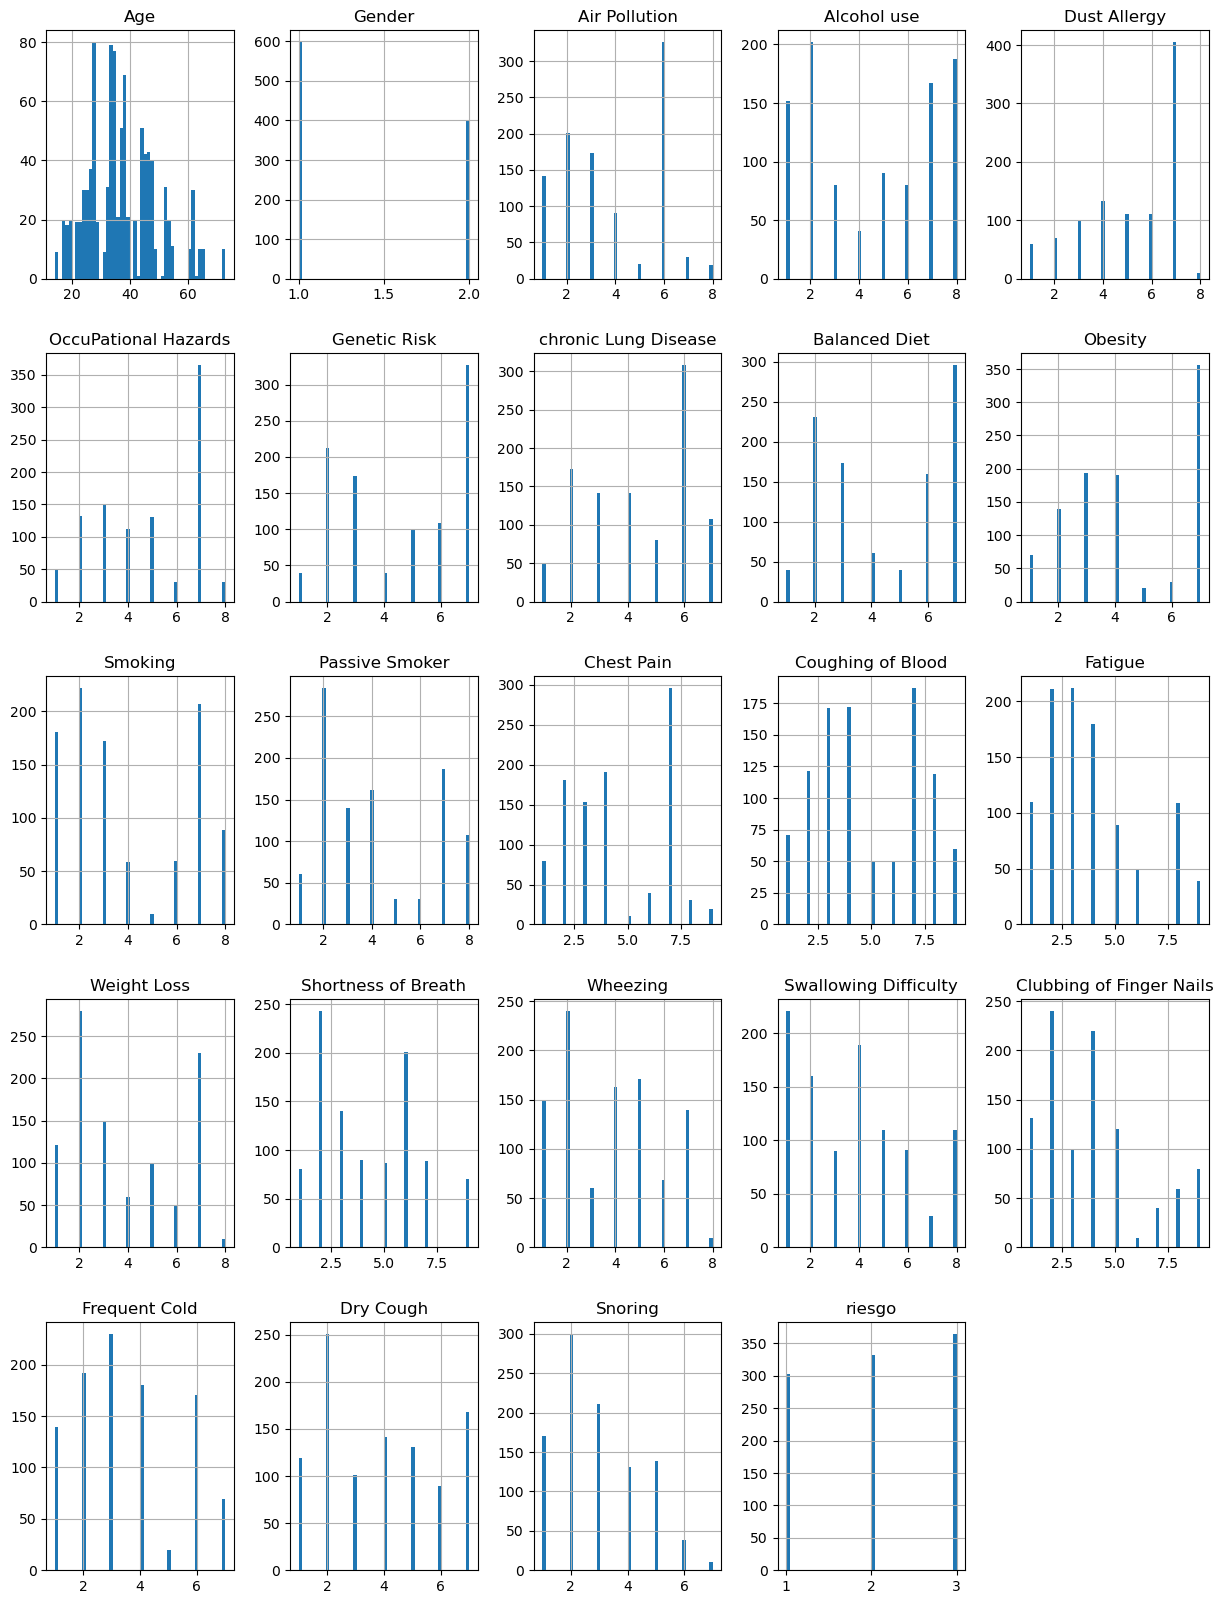

In [279]:
data.hist(bins=50,figsize=(15,20))
plt.show()

#### I want to evaluate in more depth where smokers are found and if there is a correlation between smoking and age.

In [280]:
df_smokers = data[["Age","Smoking"]]

              Age   Smoking
Age      1.000000  0.075333
Smoking  0.075333  1.000000


<Axes: >

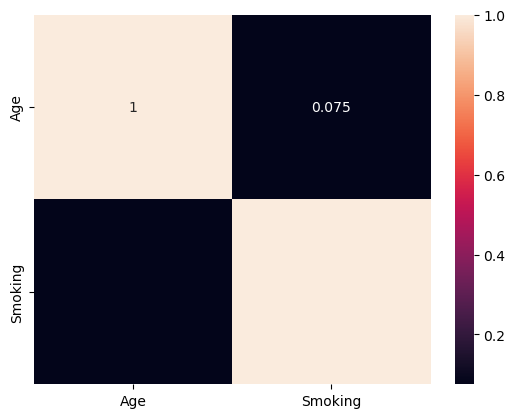

In [281]:
matriz = df_smokers.corr(method = "pearson")
print (matriz)
sns.heatmap(matriz, annot = True)

##### There is no correlation between age and smoking habit.

#### Likewise, I want to know if there is a correlation between age and the risk of cancer, considering that the distribution of the sample contains more young people than older people.

             Age    riesgo
Age     1.000000  0.060048
riesgo  0.060048  1.000000


<Axes: >

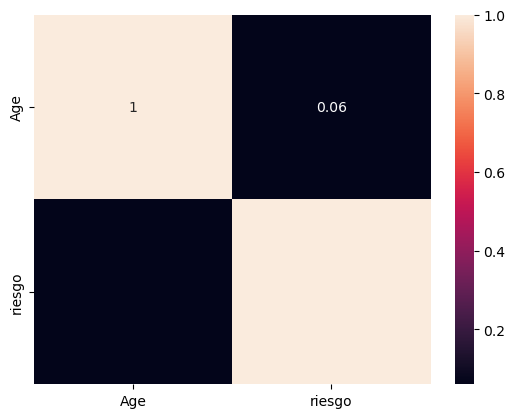

In [282]:
df_age = data[["Age","riesgo"]]
matriz2 = df_age.corr(method = "pearson")
print (matriz2)
sns.heatmap(matriz2, annot = True)

#### Apparently there is no correlation between age and the risk of having cancer
I could continue using variables, but we already know that the most predominant variables are those that have a lighter color in the heatmap.

## Getting started with Sklearn
We will start with a decision tree, separating the techniques one by one, in view of what was mentioned above

In [283]:
from sklearn.model_selection import train_test_split

In [284]:
X=data.drop("riesgo", axis = 1)
y = data["riesgo"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [285]:
print(x_train.shape)
print(y_train.shape)

(700, 24)
(800,)


In [286]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier ()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [287]:
## Probando el modelo
prediccion = tree.predict(X_test)
esperado = y_test

In [288]:
print(f'{tree.score(X_test, y_test):.2%}')

100.00%


#### Maybe overfited?
Let's try seeing the metrics

In [289]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true = esperado, y_pred = prediccion)
confusion

array([[55,  0,  0],
       [ 0, 63,  0],
       [ 0,  0, 82]], dtype=int64)

In [290]:
from sklearn.metrics import classification_report
print (classification_report(esperado, prediccion))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        55
           2       1.00      1.00      1.00        63
           3       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [291]:
df_confusion = pd.DataFrame(confusion)

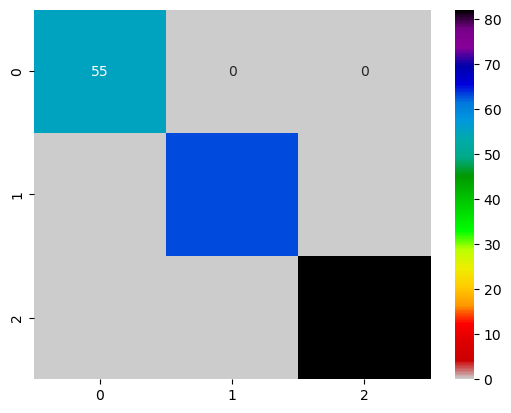

In [292]:
axes = sns.heatmap(df_confusion, annot = True, cmap = "nipy_spectral_r")

#### Apparently the model is overfitted, which could be because it is a perfect training data set.

## Let's try other models one by one

In [293]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
prediccion_2 = knn.predict(X_test)
esperado_2 = y_test
print (f'the knn score is :{knn.score(X_test, y_test):.2%}')

the knn score is :99.50%


In [294]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
prediccion_3 = svc.predict(X_test)
esperado_3 = y_test
print (f'the SVC score is :{svc.score(X_test, y_test):.2%}')

the SVC score is :96.50%


In [295]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
prediccion_4 = gnb.predict(X_test)
esperado_4 = y_test
print (f'the GNB score is :{gnb.score(X_test, y_test):.2%}')

the GNB score is :89.50%


In [296]:
from sklearn.ensemble import RandomForestClassifier
random_f = RandomForestClassifier(n_estimators=100, random_state=11)
random_f.fit(X_train, y_train)
prediccion_5 = random_f.predict(X_test)
esperado_5 = y_test
print (f'the Random Forest score is :{random_f.score(X_test, y_test):.2%}')

the Random Forest score is :100.00%


In [297]:
comparacion = {"DeTree":tree.score(X_test, y_test), "KNN":knn.score(X_test, y_test),
              "SVC": svc.score(X_test, y_test),
              "Gaussian": gnb.score(X_test, y_test),
              "RandomForest":random_f.score(X_test, y_test) }
df_comp = pd.DataFrame(comparacion, columns = comparacion.keys(), index = comparacion.values())
df_comp = df_comp.head(1)
df_comp

,DeTree,KNN,SVC,Gaussian,RandomForest
1.0,1.0,0.995,0.965,0.895,1.0


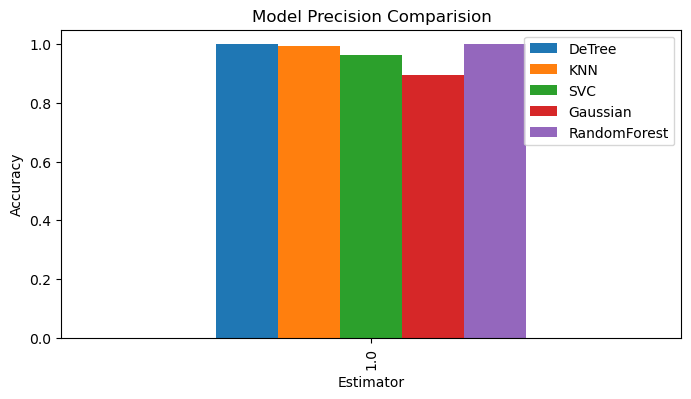

In [298]:
df_comp.plot(kind='bar', figsize=(8, 4))
plt.xlabel("Estimator")
plt.ylabel("Accuracy")
plt.title("Model Precision Comparision")
plt.show()

#### Finally, let's stay with the Random Forest and graph its options to export it and show it to the clinical service.

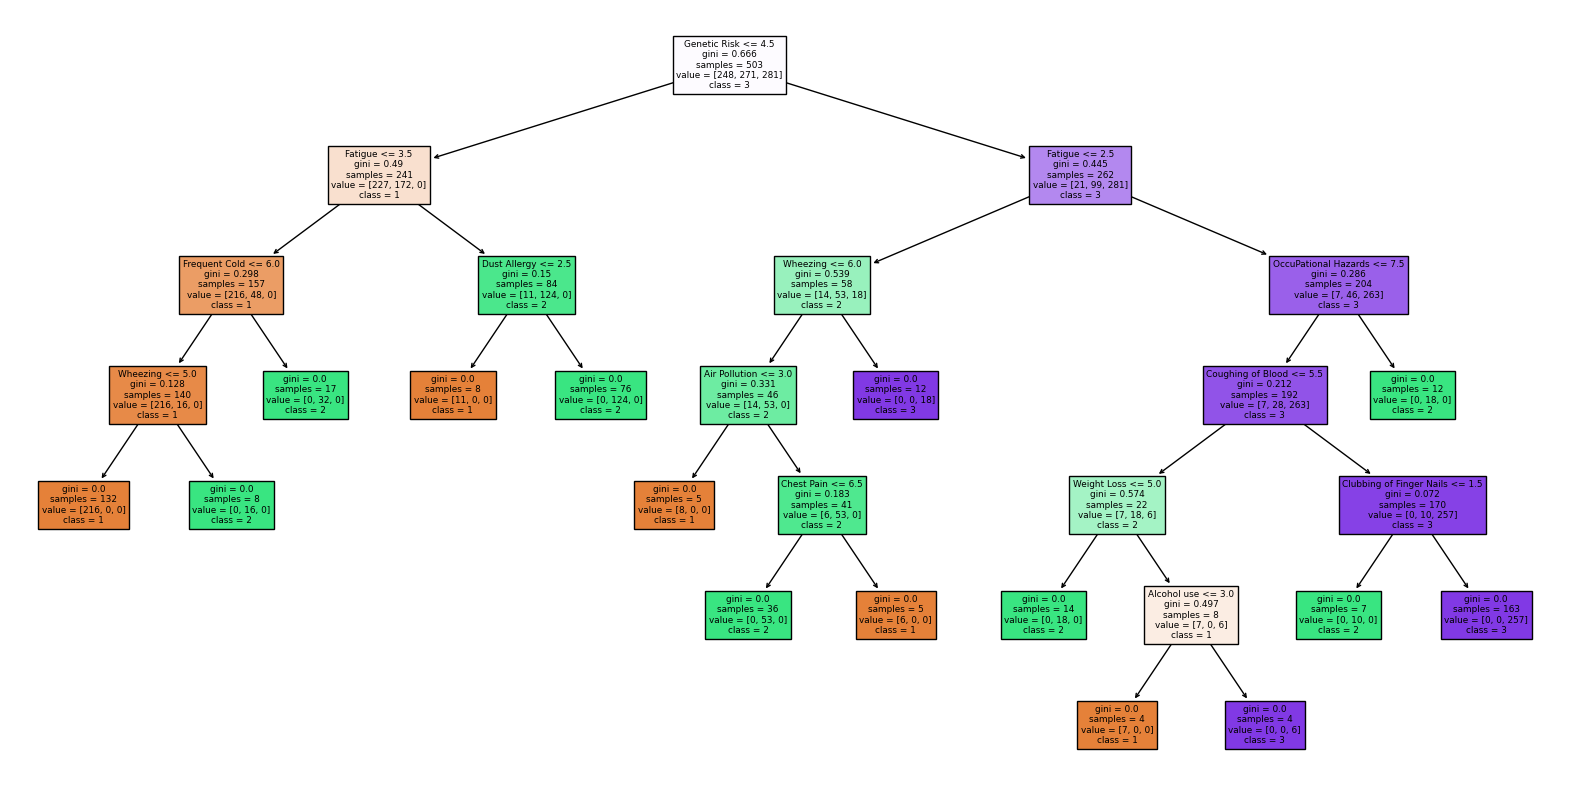

In [299]:
from sklearn.tree import plot_tree

tree_to_plot = random_f.estimators_[0]

class_names_str = list(map(str, random_f.classes_))

plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=X_train.columns, class_names=class_names_str, filled=True)
plt.savefig('decision_tree.png')
plt.show()


### Although this data set is a ready data set, where not much transformation and data cleaning is needed, it is a good dataset to practice skills and graphics.